In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gec) Chrome/111.0.0.0 Safari/537.36'}
# 
web = requests.get('https://play.google.com/store/games', headers = headers).text

'<!doctype html><html lang="en-US" dir="ltr"><head><base href="https://play.google.com/"><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1"><meta name="mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="google-site-verification" content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE"><meta name="google-site-verification" content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc"><link rel="search" href="/opensearch.xml" type="application/opensearchdescription+xml" title="Google Play"><link rel="shortcut icon" href="//www.gstatic.com/android/market_images/web/favicon_v3.ico"><script data-id="_gd" nonce="seLu2V3vNEcpPMSGRwy0jg">window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/exchange","/exchange/*","/store/ereview","/store/ereview/","/store/linkbuilder","/store/linkbuilder/","/store/movies/dev
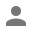
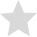
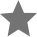
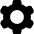
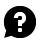
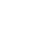
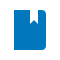
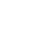
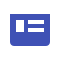
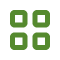
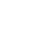
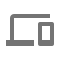
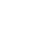
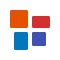
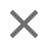
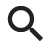
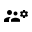
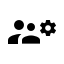
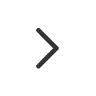
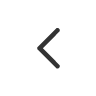
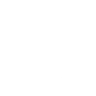
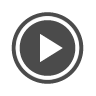
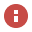
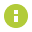
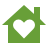
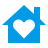
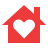
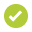
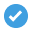
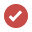

In [3]:
web

In [4]:
soup = BeautifulSoup(web, 'lxml')

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <base href="https://play.google.com/"/>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/>
  <meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/>
  <link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/>
  <link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/>
  <script data-id="_gd" nonce="seLu2V3vNEcpPMSGRwy0jg">
   window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/exchange","/exchange/*","/store/ereview","/store/ereview/","/store/linkbuil
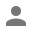
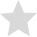
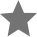
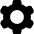
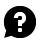
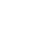
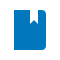
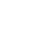
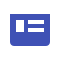
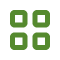
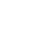
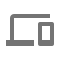
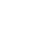
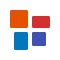
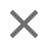
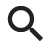
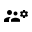
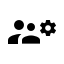
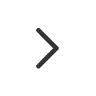
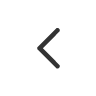
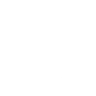
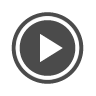
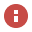
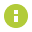
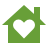
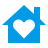
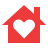
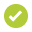
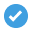
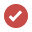

In [5]:
print(soup.prettify())

In [6]:

soup = BeautifulSoup(web, 'html.parser')

In [7]:
# Url To Scrap The Data
web = "https://play.google.com/store/games"

# Sending Requests To URL
response = requests.get(web)

# Extracting MeaningFul Info
soup = BeautifulSoup(response.text, "html.parser")

In [8]:
# Create Variable Of Scrapping div For for loop
# Use ctrl + shift + i to inspect

game_divs = soup.find_all("div", class_="ULeU3b neq64b")

In [42]:
# Declare List To Store Info

game_names = []
game_types = []
game_ratings = []
game_ranks = []

temp_rank = 0
# Scrapping All Data In Single Instance
for game_div in game_divs:
    try:
        game_name = game_div.find("div", class_="ubGTjb").find("span", class_="sT93pb").text
        game_names.append(game_name)
    except:
        game_names.append(np.nan)
    try:
        game_type = game_div.find("span", class_="sT93pb w2kbF").text
        game_types.append(game_type)
    except:
        game_types.append(np.nan)

    try:
        game_rating = game_div.find("span", class_="sT93pb CKzsaf").text
        game_ratings.append(game_rating)
    except:
        game_ratings.append(np.nan)

    try:
        game_rank = game_div.find("div", class_="ubGTjb").find("span", class_="sT93pb w2kbF").text
        game_ranks.append(game_rank)
    except:
        game_ranks.append(temp_rank+1)
        
    temp_rank +=1

In [43]:
game_df = pd.DataFrame({
    'Game Rank': game_ranks,
    'Game Name': game_names,
    'Game Ratting': game_ratings,
    'Game Type': game_types
})

In [44]:
game_df.head(45)

Game Rank                       Game Name Game Ratting    Game Type
0           1                             NaN          NaN          NaN
1           2                  Subway Surfers      4.6star       Arcade
2           3                          Roblox      4.4star    Adventure
3           4                Candy Crush Saga      4.6star       Casual
4           5                     8 Ball Pool      4.5star       Sports
5           6          Chess - Play and Learn      4.7star        Board
6           7                      Wordscapes      4.6star         Word
7           8                     Coin Master      4.6star       Casual
8           9                     FIFA Soccer      4.6star       Sports
9          10                   Cat Snack Bar      4.8star   Simulation
10         11    Woodoku - Block Puzzle Games      4.4star       Puzzle
11         12                   Magic Tiles 3      4.0star        Music
12         13                    Gardenscapes      4.5star       Casual
13         14                     Frozen City      4.5star   Simulation
14         15                         Fishdom      4.4star       Puzzle
15         16                     Survivor.io      4.7star    Adventure
16         17                     Mob Control      4.3star       Arcade
17         18                     Royal Match      4.6star       Puzzle
18         19  Solitaire - Classic Card Games      4.7star         Card
19         20                       Solitaire      4.7star         Card
20         21                     Solar Smash      4.6star   Simulation
21         22                      Pokémon GO      4.3star    Adventure
22         23  Wood Block Puzzle - Brain Game      4.5star       Puzzle
23         24             Hill Climb Racing 2      4.5star       Racing
24         25           Candy Crush Soda Saga      4.6star       Casual
25         26    Sonic Dash - Endless Running      4.7star       Arcade
26         27       Need for Speed™ No Limits      4.4star       Racing
27         28                      Wordscapes      4.6star         Word
28         29                       Minecraft      4.6star       Arcade
29         30    Sonic The Hedgehog 2 Classic      4.3star       Arcade
30         31                    Fruit Ninja®      4.5star       Arcade
31         32              Asphalt 9: Legends      4.4star       Racing
32         33              Dragon City Mobile      4.7star   Simulation
33         34     Sonic the Hedgehog™ Classic      4.2star       Action
34         35                 Mario Kart Tour      4.3star       Action
35         36   Galaxy Attack: Alien Shooting      4.7star       Arcade
36         37  Toca Life World: Build a Story      4.3star  Educational
37         38                           UNO!™      4.5star         Card
38         39             Hill Climb Racing 2      4.5star       Racing
39         40           Candy Crush Soda Saga      4.6star       Casual
40         41    Sonic Dash - Endless Running      4.7star       Arcade
41         42                       Minecraft      4.6star       Arcade
42         43    Sonic The Hedgehog 2 Classic      4.3star       Arcade
43         44                    Fruit Ninja®      4.5star       Arcade
44         45              Dragon City Mobile      4.7star   Simulation

In [45]:

# web = "https://play.google.com/store/games"


# response = requests.get(web)


# soup = BeautifulSoup(response.text, "html.parser")

# game_divs = soup.find_all("div", class_="aoJE7e b0ZfVe")

# # Declare List To Store Info

# game_names = []
# game_types = []
# game_ratings = []
# game_ranks = []

# # for game_div in game_divs:
# #     try:
# #         game_rank = game_div.find("div", class_ = 'fy9T3c')
# #         game_ranks.append(game_rank.text.strip())
# #     except:
# #         game_ranks.append(np.nan)
        
# #     try:
# #         game_name = game_div.find("span", class_="sT93pb DdYX5 OnEJge").text
# #         game_names.append(game_name.strip())
# #     except:
# #         game_names.append(np.nan)
        
# #     try:
# #         game_type = game_div.find("span", class_="sT93pb w2kbF").text
# #         game_types.append(game_type.strip())
# #     except:
# #         game_types.append(np.nan)
        
# #     try:
# #         game_rating = game_div.find("span", class_="w2kbF").text
# #         game_ratings.append(game_rating.strip())
# #     except:
# #         game_ratings.append(np.nan)



